In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import scipy.stats as stats
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data-Jochenstein.csv',header=0, index_col=0)
del df['OPO4-P [mg/l]']
del df['NO3-N [mg/l]']
df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NH4-N [mg/l],Chlorophyll,Abfluss [m³/s]
0,2016-01-01 05:45:00,12.40,4.6,491.0,8.0,0.02,NaN,549.0
1,2016-01-01 06:00:00,12.40,4.6,491.0,8.0,0.02,NaN,549.0
2,2016-01-01 06:15:00,12.40,4.6,491.0,8.0,0.03,NaN,549.0
3,2016-01-01 06:30:00,12.40,4.7,491.0,8.0,0.02,NaN,538.0
4,2016-01-01 06:45:00,12.40,4.7,491.0,8.0,0.03,NaN,538.0
...,...,...,...,...,...,...,...,...
175269,2020-12-30 23:00:00,11.88,4.2,499.6,8.2,0.05,NaN,733.0
175270,2020-12-30 23:15:00,11.89,4.2,499.4,8.2,0.05,NaN,733.0
175271,2020-12-30 23:30:00,11.90,4.2,499.2,8.2,0.05,NaN,733.0
175272,2020-12-30 23:45:00,11.90,4.2,499.3,8.2,0.05,NaN,733.0


In [3]:
print(df.isna().sum())

Datum                  0
O2 [mg/l]          20462
T [°C]             21387
LF [µS/cm]         22207
pH [--]            22221
NH4-N [mg/l]       23999
Chlorophyll       150747
Abfluss [m³/s]        58
dtype: int64


In [4]:
df = df[df['NH4-N [mg/l]'].notna()]
df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NH4-N [mg/l],Chlorophyll,Abfluss [m³/s]
0,2016-01-01 05:45:00,12.40,4.6,491.0,8.0,0.02,NaN,549.0
1,2016-01-01 06:00:00,12.40,4.6,491.0,8.0,0.02,NaN,549.0
2,2016-01-01 06:15:00,12.40,4.6,491.0,8.0,0.03,NaN,549.0
3,2016-01-01 06:30:00,12.40,4.7,491.0,8.0,0.02,NaN,538.0
4,2016-01-01 06:45:00,12.40,4.7,491.0,8.0,0.03,NaN,538.0
...,...,...,...,...,...,...,...,...
175269,2020-12-30 23:00:00,11.88,4.2,499.6,8.2,0.05,NaN,733.0
175270,2020-12-30 23:15:00,11.89,4.2,499.4,8.2,0.05,NaN,733.0
175271,2020-12-30 23:30:00,11.90,4.2,499.2,8.2,0.05,NaN,733.0
175272,2020-12-30 23:45:00,11.90,4.2,499.3,8.2,0.05,NaN,733.0


In [5]:
df = df.interpolate(method='linear')

In [6]:
df.dropna(inplace=True)
df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NH4-N [mg/l],Chlorophyll,Abfluss [m³/s]
5737,2016-03-01 00:00:00,11.90,5.4,434.0,8.1,0.05,4.0,1280.0
5738,2016-03-01 00:15:00,11.90,5.4,434.0,8.1,0.05,4.0,1280.0
5739,2016-03-01 00:30:00,11.90,5.4,434.0,8.1,0.05,4.0,1290.0
5740,2016-03-01 00:45:00,11.90,5.4,434.0,8.1,0.05,4.0,1290.0
5741,2016-03-01 01:00:00,11.90,5.3,434.0,8.1,0.05,4.0,1300.0
...,...,...,...,...,...,...,...,...
175269,2020-12-30 23:00:00,11.88,4.2,499.6,8.2,0.05,2.3,733.0
175270,2020-12-30 23:15:00,11.89,4.2,499.4,8.2,0.05,2.3,733.0
175271,2020-12-30 23:30:00,11.90,4.2,499.2,8.2,0.05,2.3,733.0
175272,2020-12-30 23:45:00,11.90,4.2,499.3,8.2,0.05,2.3,733.0


In [7]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [8]:
df['month'] = pd.DatetimeIndex(df['Datum']).month
df = encode(df, 'month', 12)

df['day'] = pd.DatetimeIndex(df['Datum']).day
df = encode(df, 'day', 365)

df['hour'] = pd.DatetimeIndex(df['Datum']).hour
df = encode(df, 'hour', 23)

df

,Datum,O2 [mg/l],T [°C],LF [µS/cm],pH [--],NH4-N [mg/l],Chlorophyll,Abfluss [m³/s],month,month_sin,month_cos,day,day_sin,day_cos,hour,hour_sin,hour_cos
5737,2016-03-01 00:00:00,11.90,5.4,434.0,8.1,0.05,4.0,1280.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
5738,2016-03-01 00:15:00,11.90,5.4,434.0,8.1,0.05,4.0,1280.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
5739,2016-03-01 00:30:00,11.90,5.4,434.0,8.1,0.05,4.0,1290.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
5740,2016-03-01 00:45:00,11.90,5.4,434.0,8.1,0.05,4.0,1290.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,0,0.000000e+00,1.000000
5741,2016-03-01 01:00:00,11.90,5.3,434.0,8.1,0.05,4.0,1300.0,3,1.000000e+00,6.123234e-17,1,0.017213,0.999852,1,2.697968e-01,0.962917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175269,2020-12-30 23:00:00,11.88,4.2,499.6,8.2,0.05,2.3,733.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000
175270,2020-12-30 23:15:00,11.89,4.2,499.4,8.2,0.05,2.3,733.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000
175271,2020-12-30 23:30:00,11.90,4.2,499.2,8.2,0.05,2.3,733.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000
175272,2020-12-30 23:45:00,11.90,4.2,499.3,8.2,0.05,2.3,733.0,12,-2.449294e-16,1.000000e+00,30,0.493776,0.869589,23,-2.449294e-16,1.000000


In [9]:
columns = ['Chlorophyll','Abfluss [m³/s]']
df[columns] = df[columns].apply(np.log)

In [10]:
# train-test 80-20 split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 100)

NH4-N [mg/l]      1.000000
O2 [mg/l]         0.427563
LF [µS/cm]        0.383391
month_cos         0.363756
month_sin         0.317250
Abfluss [m³/s]    0.168675
hour_sin          0.018861
day_cos           0.015064
hour_cos          0.006473
day_sin          -0.010332
day              -0.010688
hour             -0.015017
pH [--]          -0.090854
Chlorophyll      -0.141293
month            -0.221331
T [°C]           -0.522434
Name: NH4-N [mg/l], dtype: float64

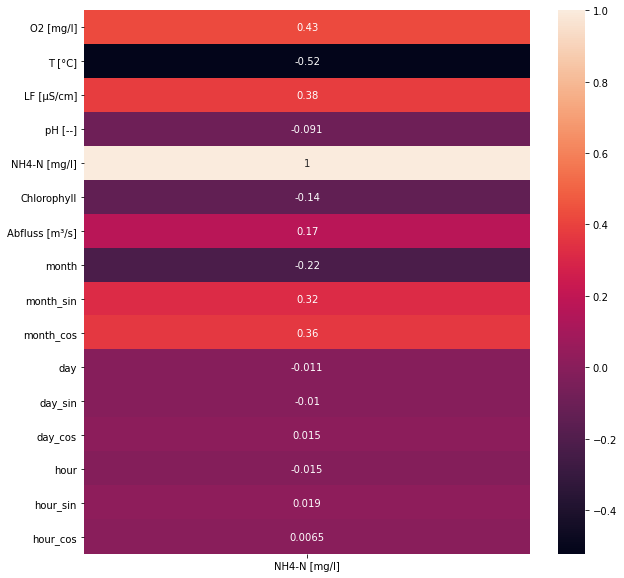

In [11]:
X_NAMES1 = ['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','NH4-N [mg/l]','OPO4-P [mg/l]','Chlorophyll','Abfluss [m³/s]']
Y_NAMES1 = ['NH4-N [mg/l]']

corr = df_train.corr()
corr = corr.loc[:, Y_NAMES1]
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
corr['NH4-N [mg/l]'].sort_values(ascending=False)

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

In [13]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_train = df_train[['NH4-N [mg/l]']]

X_test = df_test[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_test = df_test[['NH4-N [mg/l]']]

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

0.016658926956411177 0.40485403763199085


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, max_depth = 10)
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
from sklearn.feature_selection import RFECV
forest = RandomForestRegressor(n_jobs=-1, max_depth = 10)
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=forest,
    step=1,
    cv=5,
    scoring='neg_mean_squared_error',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
features

In [ ]:
X_train = df_train[['T [°C]']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_validate
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r21 = scores['test_r2'].mean()
rmse1 = np.sqrt(abs(score))
print(rmse1, r21)

In [ ]:
X_train = df_train[['T [°C]','mnth_cos']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r22 = scores['test_r2'].mean()
rmse2 = np.sqrt(abs(score))
print(rmse2, r22)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r23 = scores['test_r2'].mean()
rmse3 = np.sqrt(abs(score))
print(rmse3, r23)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r24 = scores['test_r2'].mean()
rmse4 = np.sqrt(abs(score))
print(rmse4, r24)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Abfluss [m³/s]']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r25 = scores['test_r2'].mean()
rmse5 = np.sqrt(abs(score))
print(rmse5, r25)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Abfluss [m³/s]','Chlorophyll']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r26 = scores['test_r2'].mean()
rmse6 = np.sqrt(abs(score))
print(rmse6, r26)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]','pH [--]']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r27 = scores['test_r2'].mean()
rmse7 = np.sqrt(abs(score))
print(rmse7, r27)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]','pH [--]','mnth_cos','mnth_sin']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r28 = scores['test_r2'].mean()
rmse8 = np.sqrt(abs(score))
print(rmse8, r28)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]','pH [--]','mnth_cos','mnth_sin','hr_sin']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r29 = scores['test_r2'].mean()
rmse9 = np.sqrt(abs(score))
print(rmse9, r29)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]','pH [--]','mnth_cos','mnth_sin','hr_sin','hr_cos']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r210 = scores['test_r2'].mean()
rmse10 = np.sqrt(abs(score))
print(rmse10, r210)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]','pH [--]','mnth_cos','mnth_sin','hr_sin','hr_cos','d_cos']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r211 = scores['test_r2'].mean()
rmse11 = np.sqrt(abs(score))
print(rmse11, r211)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Chlorophyll','Abfluss [m³/s]','pH [--]','mnth_cos','mnth_sin','hr_sin','hr_cos','d_cos','d_sin']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r212 = scores['test_r2'].mean()
rmse12 = np.sqrt(abs(score))
print(rmse12, r212)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin','minute_sin']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r213 = scores['test_r2'].mean()
rmse13 = np.sqrt(abs(score))
print(rmse13, r213)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_cos','hr_sin','minute_sin','minute_cos']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_val_score
scores = cross_validate(LR, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r214 = scores['test_r2'].mean()
rmse14 = np.sqrt(abs(score))
print(rmse14, r214)

In [ ]:
plt.figure(figsize=(11,5))
plt.xticks(range(1,15))
plt.xlabel('Number of variables')
plt.ylabel('RMSE')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14],[rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8,rmse9,rmse10,rmse11,rmse12,rmse13,rmse14])

In [ ]:
plt.figure(figsize=(11,5))
plt.xticks(range(1,15))
plt.xlabel('Number of variables')
plt.ylabel('R Squared')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14],[r21,r22,r23,r24,r25,r26,r27,r28,r29,r210,r211,r212,r213,r214])

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_train = df_train[['NH4-N [mg/l]']]

X_test = df_test[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_test = df_test[['NH4-N [mg/l]']]

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linear = LinearRegression()
best_LR = linear.fit(X_train,y_train)
y_LR = best_LR.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_LR))
r2 = r2_score(y_test,y_LR)
print(RMSE_LR,r2)

In [ ]:
X = df[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','mnth_sin','mnth_cos','d_sin','d_cos','hr_sin','hr_cos','minute_sin','minute_cos']]
y = df[['NH4-N [mg/l]']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=-1, max_depth = 10)
forest.fit(X, y)

from sklearn.feature_selection import RFE

# define RFE
rfe = RFE(forest, n_features_to_select=6)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, max_depth = 10)

In [ ]:
X_train = df_train[['T [°C]']]
y_train = df_train[['NH4-N [mg/l]']]

from sklearn.model_selection import cross_validate
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]']]
y_train = df_train[['NH4-N [mg/l]']]
from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]']]
y_train = df_train[['NH4-N [mg/l]']]
from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Abfluss [m³/s]']]
y_train = df_train[['NH4-N [mg/l]']]
from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','Abfluss [m³/s]','Chlorophyll']]
y_train = df_train[['NH4-N [mg/l]']]
from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]']]
y_train = df_train[['NH4-N [mg/l]']]
from sklearn.model_selection import cross_val_score
scores = cross_validate(rf, X_train, y_train, scoring=['neg_mean_squared_error','r2'], cv=5,n_jobs=-1)
score = scores['test_neg_mean_squared_error'].mean()
r2 = scores['test_r2'].mean()
rmse = np.sqrt(abs(score))
print(rmse, r2)

In [ ]:
X_train = df_train[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_train = df_train[['NH4-N [mg/l]']]

X_test = df_test[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_test = df_test[['NH4-N [mg/l]']]

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [6, 12, 20],
    'min_samples_split': [6, 12, 20]
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=-1, max_depth = 10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
features=X_train.columns[[0,1,2,3,4,5,6,7,8,9,10,11]]
importances = best_grid.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
X_test = df_test[['O2 [mg/l]','T [°C]','LF [µS/cm]','pH [--]','Chlorophyll','Abfluss [m³/s]','month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos']]
y_test = df_test[['NH4-N [mg/l]']]

y_rf = best_grid.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE_rf=np.sqrt(mean_squared_error(y_test,y_rf))
r2_rf = r2_score(y_test,y_rf)
print(RMSE_rf,r2_rf)

In [ ]:
y_test = y_test.to_numpy()
sub_df = pd.DataFrame({'Observed':y_test.ravel(),'LR Predicted':y_LR.ravel(), 'RF Predicted':y_rf.ravel()})
sub_df

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=y_test, y=y_LR, data=sub_df, label='LR predicted')
sns.regplot(x=y_test, y=y_rf, data=sub_df, label='RF predicted')
plt.suptitle('Jochenstein NH4')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend(title='Legend', loc='upper left')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=sub_df)
plt.suptitle('Jochenstein NH4')

In [ ]:
NRMSE_LR = RMSE_LR/(sub_df['LR Predicted'].mean())
NRMSE_rf = RMSE_rf/(sub_df['RF Predicted'].mean())
print(NRMSE_LR,NRMSE_rf)

In [ ]:
writer = pd.ExcelWriter('NH4-Pfelling.xlsx')
sub_df.to_excel(writer)
writer.save()